In [19]:
from modelUtils.lr_utils import find_learning_rate
from modelUtils.vae_utils import create_vae
from utils import data_train_test
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
cur = os.getcwd()
filepath = os.path.join(cur, '../outputs/megasample_cleaned.csv')

## Finding the best Initial Learning Rate

In [21]:
h_dim = [100]
z_dim = 20
batch_size = 64
epochs = 100
lr = 0.005

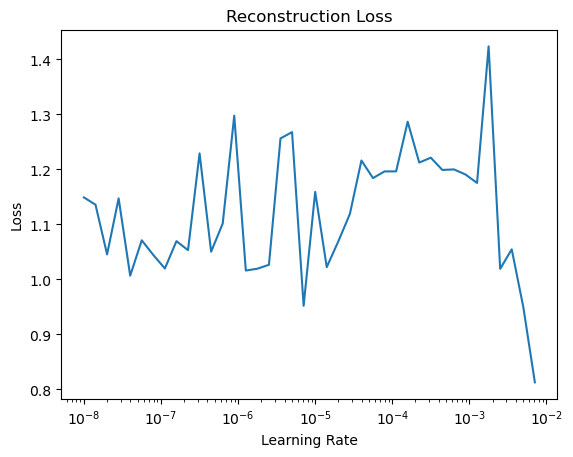

In [22]:
train_data, test_data = data_train_test(filepath)
n_features = train_data.element_spec[0].shape[0]
vae = create_vae(n_features,h_dim,z_dim)
log_dict = find_learning_rate(train_data,vae,max_lr=0.01,n_steps=40,batch_size=40)
lrs = log_dict['lr']
rec_losses = log_dict['reconstruction_loss']
plt.plot(lrs, rec_losses)
plt.title('Reconstruction Loss')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

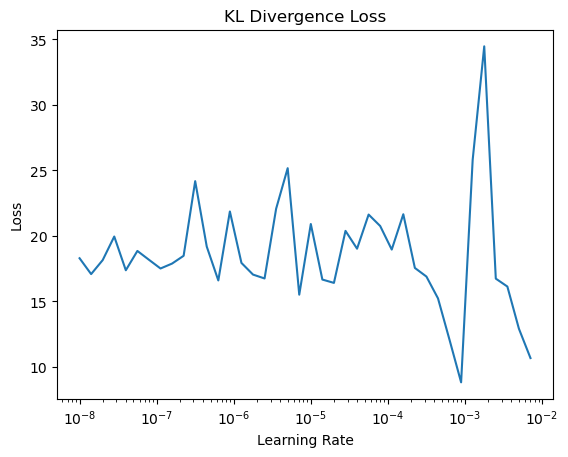

34.46478271484375


In [23]:
kl_losses = log_dict['kl_loss']
plt.plot(lrs, kl_losses)
plt.title('KL Divergence Loss')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()
print(max(kl_losses))

In [24]:
print(f'Best Initial LR for reconstruction loss: {lrs[rec_losses.index(max(rec_losses))]}')
print(f'Best Initial LR for KL Divergence loss: {lrs[kl_losses.index(max(kl_losses))]}')

Best Initial LR for reconstruction loss: 0.0017782794311642647
Best Initial LR for KL Divergence loss: 0.0017782794311642647
